In [2]:
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import glob

In [3]:
band6R = '/Users/Airton/Desktop/band6/results_test/weather/test_latest/images/*real_B.png'
bad6F = '/Users/Airton/Desktop/band6/results_test/weather/test_latest/images/*fake_B.png'

In [4]:
MSE = [] 
SSIM =[]

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [5]:
run1R = []
for filename in sorted(glob.glob('/Users/Airton/Desktop/b2sparseless/results/weather/test_latest/images/*real_B.png')):
    im=Image.open(filename).convert('L')
    run1R.append(im)

In [6]:
run1F = []
for filename in sorted(glob.glob('/Users/Airton/Desktop/b2sparseless/results/weather/test_latest/images/*fake_B.png')):
    im=Image.open(filename).convert('L')
    run1F.append(im)

In [7]:
print(len(run1F))
print(len(run1R))

50
50


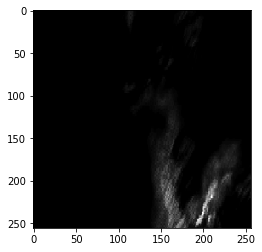

In [8]:
plt.imshow(np.array(run1R[0]),cmap='gray')
plt.show()

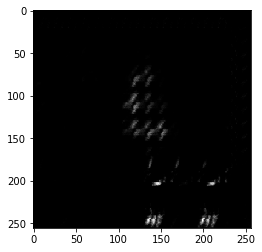

In [9]:
plt.imshow(np.array(run1F[0]),cmap='gray')
plt.show()

In [10]:
MSE = []
SSIM = []
for i in range(len(run1R)):
    m = mse(np.array(run1R[i]),np.array(run1F[i]))
    s = ssim(np.array(run1R[i]),np.array(run1F[i]))
    MSE.append(m)
    SSIM.append(s)

In [11]:
print(MSE)

[377.9062957763672, 328.4974822998047, 134.12442016601562, 277.0345001220703, 326.2200469970703, 176.14480590820312, 119.8067626953125, 349.33204650878906, 190.65768432617188, 411.51165771484375, 179.79299926757812, 268.662841796875, 335.6173095703125, 655.8805541992188, 184.48602294921875, 190.96200561523438, 302.1625061035156, 389.7051544189453, 198.0554656982422, 363.0935363769531, 280.39239501953125, 230.1804656982422, 316.218994140625, 251.42591857910156, 220.25064086914062, 241.69871520996094, 287.3503723144531, 298.4565887451172, 373.4444274902344, 249.8106689453125, 94.73822021484375, 162.66500854492188, 111.82859802246094, 195.82513427734375, 248.6372528076172, 104.67384338378906, 121.39688110351562, 200.01222229003906, 371.70672607421875, 159.87680053710938, 170.37530517578125, 168.53089904785156, 170.918701171875, 151.7161407470703, 229.7826385498047, 171.63900756835938, 127.21524047851562, 135.85154724121094, 100.50994873046875, 122.18074035644531]


In [12]:
print(SSIM)

[0.7656203511636233, 0.8077797717866557, 0.844096969027151, 0.8466714223152703, 0.8633381677724177, 0.8888854635916836, 0.8467497020508165, 0.7395942634314483, 0.7987086359059757, 0.7846449897124076, 0.8108042185076691, 0.86852979898523, 0.8294728372525905, 0.7402371408293856, 0.8890071603626815, 0.8095738495004117, 0.8048854464768929, 0.8197778370695614, 0.846963449517086, 0.8586748776523901, 0.856403161426889, 0.9053406549273771, 0.8994690634863719, 0.8203425816638157, 0.8080422906452237, 0.8506588719152851, 0.8385506880519199, 0.816358377299317, 0.9003399585241303, 0.8980655121393698, 0.8974450377535229, 0.8327551411903056, 0.8816622380411618, 0.8527855745609328, 0.8206441818308534, 0.8461931953868521, 0.8609845319874961, 0.8522060497410743, 0.8030025792498134, 0.8744399480942873, 0.8512797347374087, 0.8384480375120411, 0.8257080058261513, 0.7984174528747974, 0.749569722166661, 0.8383232145743734, 0.8345102632028579, 0.8015636986525059, 0.8229672436185388, 0.8590215673969912]


In [13]:
x=list(range(0,50))

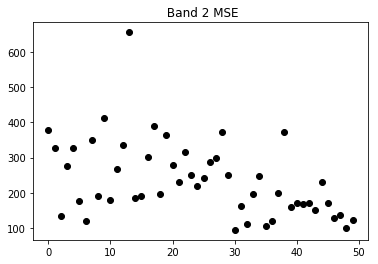

94.73822021484375 655.8805541992188
236.57928283691408


In [14]:
plt.scatter(x,MSE,c='black')
plt.title(" Band 2 MSE")
plt.show()
print(min(MSE),max(MSE))
print(np.mean(MSE))

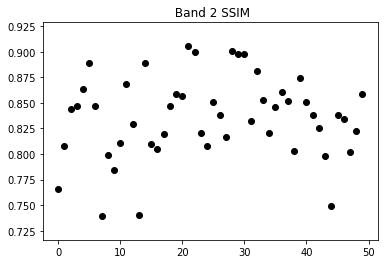

0.7395942634314483 0.9053406549273771
0.8359902986277935


In [15]:
plt.scatter(x,SSIM,c='black')
plt.title(" Band 2 SSIM")
plt.show()
print(min(SSIM),max(SSIM))
print(np.mean(SSIM))

In [16]:
from sklearn.metrics import confusion_matrix

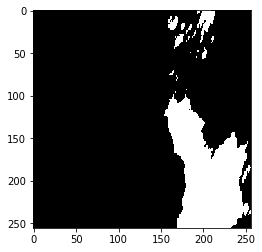

In [17]:
Thr = cv2.threshold(np.array(run1R[1]),1,255,cv2.THRESH_BINARY)
plt.imshow(Thr[1],cmap = 'gray')
plt.show()

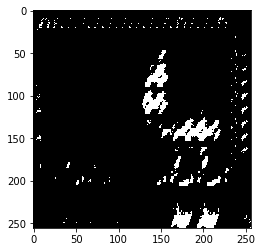

In [18]:
Thf = cv2.threshold(np.array(run1F[1]),1,255,cv2.THRESH_BINARY)
plt.imshow(Thf[1],cmap = 'gray')
plt.show()

In [19]:
Fthr = []
Fthf = []
for i in range(len(run1R)):
    gray_img= np.array(run1R[i])
    gray_img2= np.array(run1F[i])
    th1 = cv2.threshold(gray_img,1,255,cv2.THRESH_BINARY)
    th2 = cv2.threshold(gray_img2,1,255,cv2.THRESH_BINARY)
    Fr = list(th1[1].flatten())
    Ff = list(th2[1].flatten())
    Fthr.append(Fr)
    Fthf.append(Ff)

In [20]:
TN,FP,FN,TP = 0,0,0,0
TN1,FP1,FN1,TP1 = 0,0,0,0

In [21]:
for i in range(len(Fthr)):
    tn,fp,fn,tp=confusion_matrix(Fthr[i], Fthf[i]).ravel()
    TN = TN +tn
    FP = FP +fp
    FN = FN +fn
    TP = TP +tp

In [32]:
Total = TN+FP+FN+TP
TotalP = FN + TP
TotalN = TN + FP
PTN = (TN/Total)*100
PFP = (FP/Total)*100
PFN = (FN/Total)*100
PTP = (TP/Total)*100

In [23]:
PTC = []

In [24]:
PTC.append([PTN,PFP,PFN,PTP])

In [25]:
print(len(PTC))
print(PTC)

1
[[85.8411865234375, 4.39898681640625, 7.961395263671875, 1.7984313964843748]]


In [36]:
Correct = PTN + PTP
Wrong = PFN + PFP
print("Correct = ", Correct, " Wrong = ", Wrong)

Correct =  87.63961791992188  Wrong =  12.360382080078125


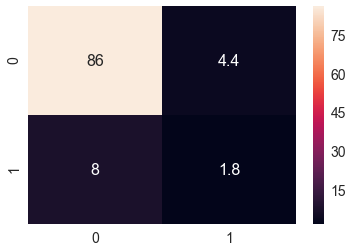

In [26]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[PTN,PFP],
        [PFN,PTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

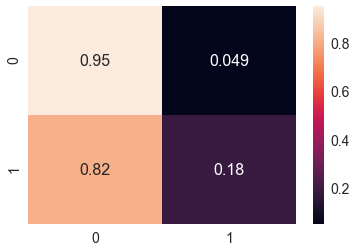

In [33]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TN/TotalN,FP/TotalN],
        [FN/TotalP,TP/TotalP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size